# Forecaster Demo

Forecaster has 4 major functions:
- Mpost2R, convert an array of masses to a probabilisticaly determined array of corresponding radii
- Mstat2R, convert summary statistics of a mass to summary statistics of a radius
- Rpost2M, the inverse of Mpost2R
- Rstat2M, the inverse of Mstat2R

Here, we'll demonstrate each, plus the helper function draw_from_asymmetric


In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import forecaster

## Mpost2R

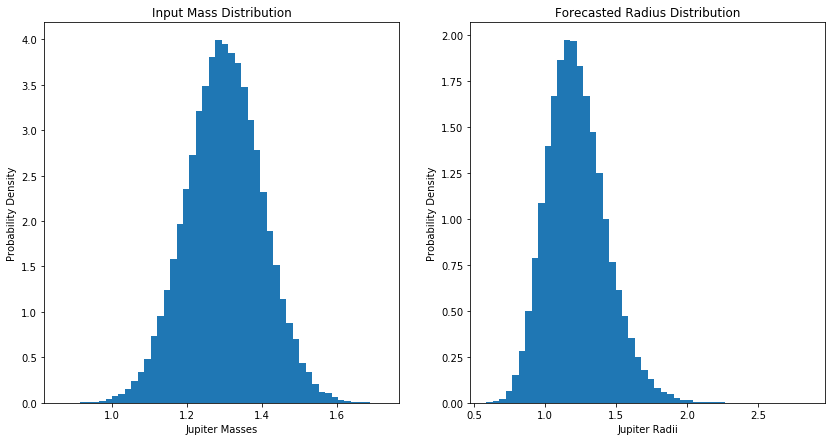

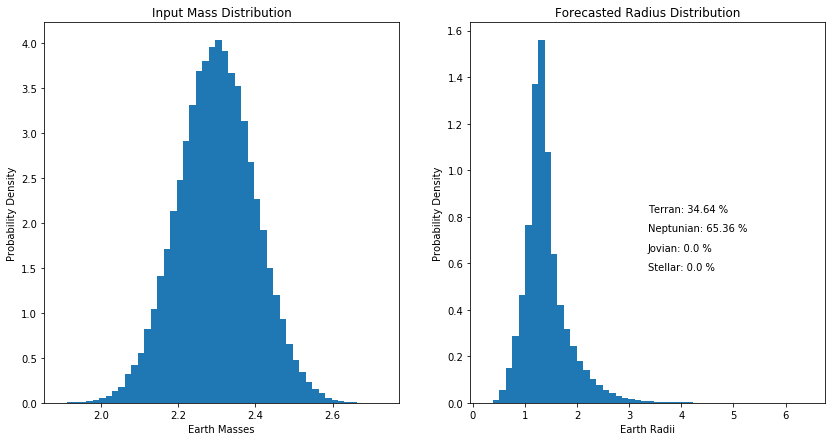

In [2]:
# Example without classification:
fake_mass_distribution = np.random.normal(loc=1.3, scale=0.1, size=100000)

forecasted_radii = forecaster.Mpost2R(fake_mass_distribution,
                                      unit='Jupiter',
                                      classify=False)

fig, ax = plt.subplots(ncols=2, figsize=(14,7))
_=ax[0].hist(fake_mass_distribution, bins=50, density=True)
_=ax[0].set(xlabel='Jupiter Masses', ylabel='Probability Density',
          title='Input Mass Distribution')
_=ax[1].hist(forecasted_radii, bins=50, density=True)
_=ax[1].set(xlabel='Jupiter Radii', ylabel='Probability Density',
          title='Forecasted Radius Distribution')

# Example with classification:
fake_mass_distribution = np.random.normal(loc=2.3, scale=0.1, size=100000)

forecasted_radii, classification = forecaster.Mpost2R(fake_mass_distribution,
                                      unit='Earth',
                                      classify=True)

fig, ax = plt.subplots(ncols=2, figsize=(14,7))
_=ax[0].hist(fake_mass_distribution, bins=50, density=True)
_=ax[0].set(xlabel='Earth Masses', ylabel='Probability Density',
          title='Input Mass Distribution')
_=ax[1].hist(forecasted_radii, bins=50, density=True)
_=ax[1].set(xlabel='Earth Radii', ylabel='Probability Density',
          title='Forecasted Radius Distribution')
for i in range(4):
    _=ax[1].annotate(str(list(classification.keys())[i]) + ': ' +\
                     str(round(list(classification.values())[i],2)) + ' %',
                    xy=(0.5, 0.5-i*0.05), xycoords='axes fraction')

## Mstat2R

In [3]:
print('Example without classification:')
X = forecaster.Mstat2R(mean=1.3, onesig_neg=0.1, onesig_pos=0.1, 
            unit='Jupiter',
            n_mass_samples=int(1e3),
            classify=False)
print('Forecasted [median, +1 sig, -1 sig]:')
print(X)
print()


print('Example with classification:')
Y = forecaster.Mstat2R(mean=1.3, onesig_neg=0.1, onesig_pos=0.1, 
            unit='Earth',
            n_mass_samples=int(1e3),
            classify=True)
print('Forecasted [median, +1 sig, -1 sig]:')
print(Y[0])
print(Y[1])

Example without classification:
Forecasted [median, +1 sig, -1 sig]:
[ 1.20288229  0.2104774  -0.18948938]

Example with classification:
Forecasted [median, +1 sig, -1 sig]:
[ 1.08813407  0.12922506 -0.11335207]
{'Terran': 90.8, 'Neptunian': 9.2, 'Jovian': 0.0, 'Stellar': 0.0}


## Rpost2M

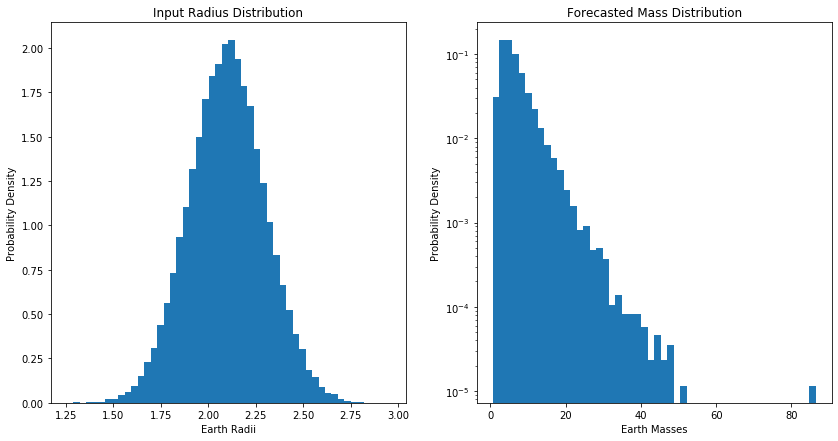

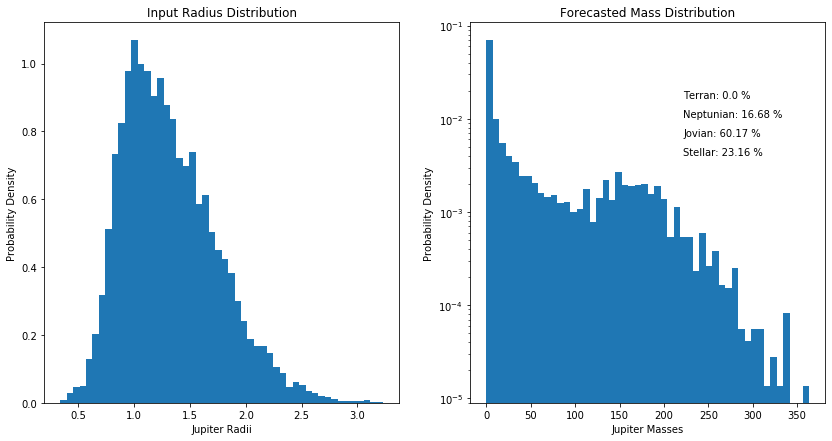

In [4]:
# Example without classification:
fake_radius_distribution = np.random.normal(loc=2.1, scale=0.2, size=50000)

forecasted_masses = forecaster.Rpost2M(fake_radius_distribution,
                                       unit='Earth',
                                       classify=False)

fig, ax = plt.subplots(ncols=2, figsize=(14,7))
_=ax[0].hist(fake_radius_distribution, bins=50, density=True)
_=ax[0].set(xlabel='Earth Radii', ylabel='Probability Density',
            title='Input Radius Distribution')
_=ax[1].hist(forecasted_masses, bins=50, density=True)
_=ax[1].set(xlabel='Earth Masses', ylabel='Probability Density',
            title='Forecasted Mass Distribution', yscale='log')


# Example with classification:
fake_radius_distribution = forecaster.draw_from_asymmetric(mu=1,
                                                          signeg=0.2,
                                                          sigpos=0.6,
                                                          xmin=0, xmax=np.inf,
                                                          nsamples=10000)

forecasted_masses, classification = forecaster.Rpost2M(fake_radius_distribution,
                                                       unit='Jupiter',
                                                       classify=True)

fig, ax = plt.subplots(ncols=2, figsize=(14,7))
_=ax[0].hist(fake_radius_distribution, bins=50, density=True)
_=ax[0].set(xlabel='Jupiter Radii', ylabel='Probability Density',
            title='Input Radius Distribution')
_=ax[1].hist(forecasted_masses, bins=50, density=True)
_=ax[1].set(xlabel='Jupiter Masses', ylabel='Probability Density',
            title='Forecasted Mass Distribution', yscale='log')
for i in range(4):
    _=ax[1].annotate(str(list(classification.keys())[i]) + ': ' +\
                     str(round(list(classification.values())[i],2)) + ' %',
                     xy=(0.6, 0.8-i*0.05), xycoords='axes fraction')

## Rstat2M

In [5]:
print('Example without classification:')
X = forecaster.Rstat2M(mean=1, onesig_neg=0.1, onesig_pos=0.1, 
            unit='Earth', n_radii_samples=int(1e3),
            mass_grid_size=int(1e3), classify=False)
print('Forecasted [median, +1 sig, -1 sig]:')
print(X)
print()


print('Example with classification:')
Y = forecaster.Rstat2M(mean=0.8, onesig_neg=0.2, onesig_pos=0.05, 
            unit='Jupiter', n_radii_samples=int(1e3),
            mass_grid_size=int(1e3), classify=True)
print('Forecasted [median, +1 sig, -1 sig]:')
print(Y[0])
print(Y[1])

Example without classification:
Forecasted [median, +1 sig, -1 sig]:
[ 0.95965497  0.82829498 -0.40001734]

Example with classification:
Forecasted [median, +1 sig, -1 sig]:
[ 0.17237884 17.7864396  -0.09718823]
{'Terran': 0.0026999999999999997, 'Neptunian': 71.9251, 'Jovian': 27.5096, 'Stellar': 0.5626}
